In [1]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
from sklearn import ensemble, tree, linear_model
import missingno as msno

In [7]:
test = pd.read_csv("mpg.csv")

In [20]:
numeric_features = test.select_dtypes(include=[np.number])

numeric_features.columns

Index(['mpg', 'cylinders', 'displacement', 'weight', 'acceleration',
       'model year', 'origin'],
      dtype='object')

In [21]:
categorical_features = test.select_dtypes(include=[np.object])
categorical_features.columns

/var/folders/q0/fyh0xjv93d55ggfv50jvy1qh0000gn/T/ipykernel_49371/647479608.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_features = test.select_dtypes(include=[np.object])


Index(['horsepower', 'car name'], dtype='object')

<AxesSubplot:>

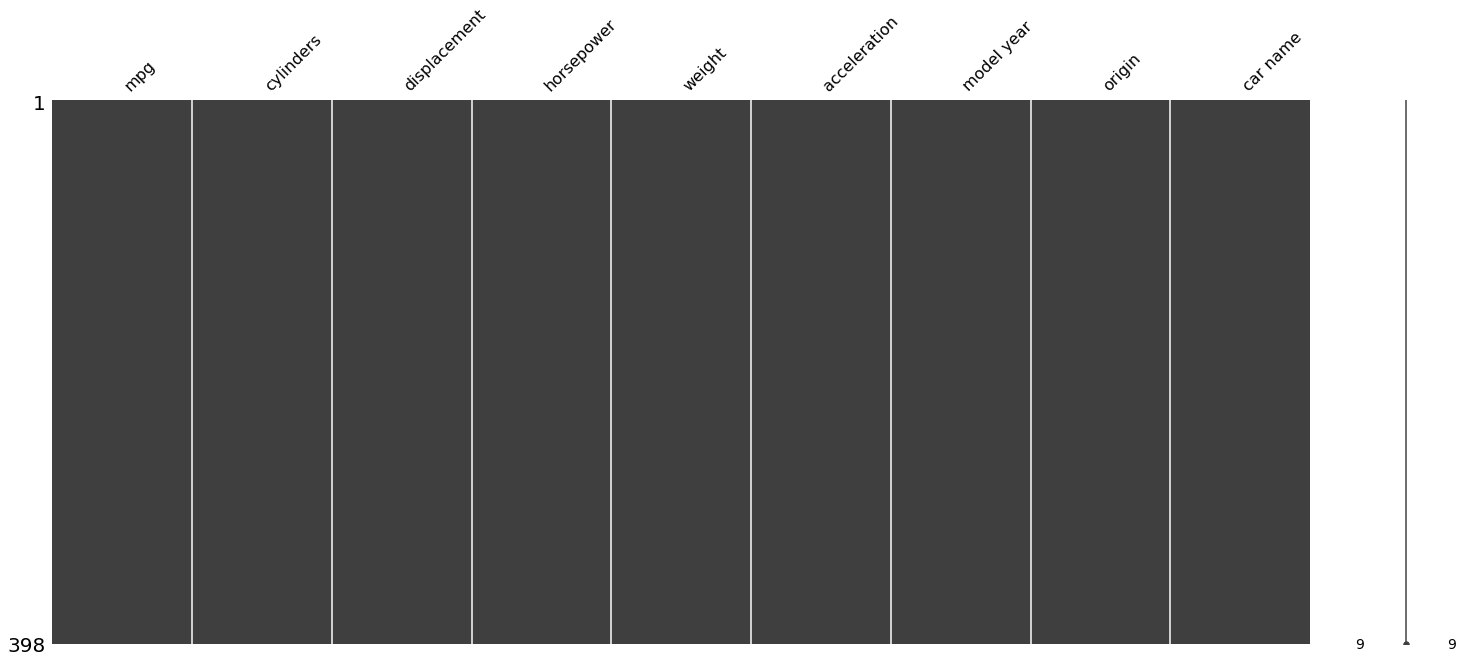

In [8]:
# Identify missing values

msno.matrix(test)

In [10]:
# Estimate Skewness and Kurtosis

test.skew(), test.kurt()

/var/folders/q0/fyh0xjv93d55ggfv50jvy1qh0000gn/T/ipykernel_49371/3068316915.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  test.skew(), test.kurt()


(mpg             0.457066
 cylinders       0.526922
 displacement    0.719645
 weight          0.531063
 acceleration    0.278777
 model year      0.011535
 origin          0.923776
 dtype: float64,
 mpg            -0.510781
 cylinders      -1.376662
 displacement   -0.746597
 weight         -0.785529
 acceleration    0.419497
 model year     -1.181232
 origin         -0.817597
 dtype: float64)

/Users/kazuma/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/kazuma/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/kazuma/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

<AxesSubplot:title={'center':'Log Normal'}, xlabel='mpg'>

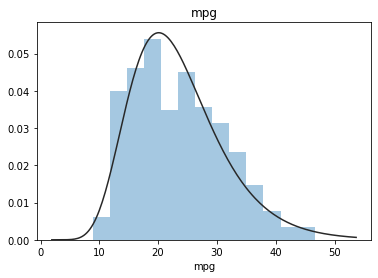

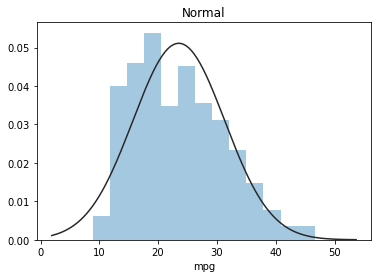

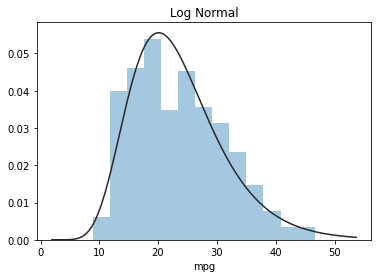

In [12]:
y = test['mpg']
plt.figure(1); plt.title('mpg')
sns.distplot(y, kde=False, fit=st.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)

/var/folders/q0/fyh0xjv93d55ggfv50jvy1qh0000gn/T/ipykernel_49371/1111406173.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sns.distplot(test.skew(),color='blue',axlabel ='Skewness')
/Users/kazuma/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Skewness', ylabel='Density'>

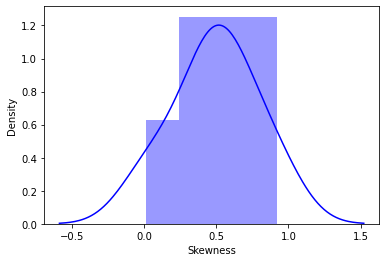

In [13]:
sns.distplot(test.skew(),color='blue',axlabel ='Skewness')

/var/folders/q0/fyh0xjv93d55ggfv50jvy1qh0000gn/T/ipykernel_49371/175615258.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sns.distplot(test.kurt(),color='r',axlabel ='Kurtosis',norm_hist= False, kde = True,rug = False)
/Users/kazuma/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


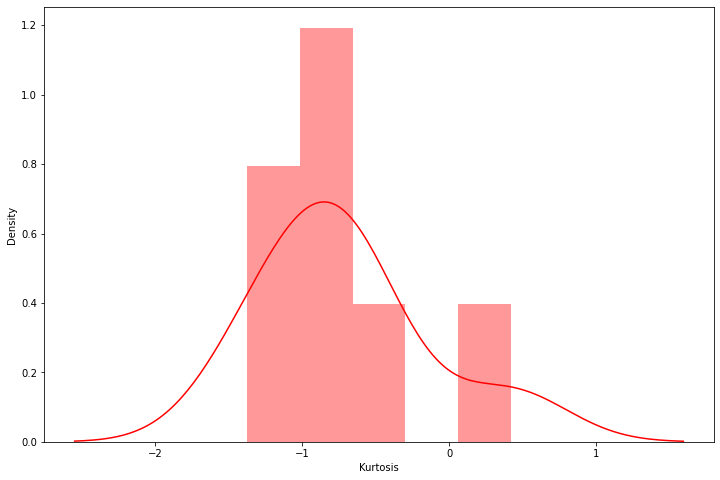

In [14]:
plt.figure(figsize = (12,8))
sns.distplot(test.kurt(),color='r',axlabel ='Kurtosis',norm_hist= False, kde = True,rug = False)
#plt.hist(train.kurt(),orientation = 'vertical',histtype = 'bar',label ='Kurtosis', color ='blue')
plt.show()

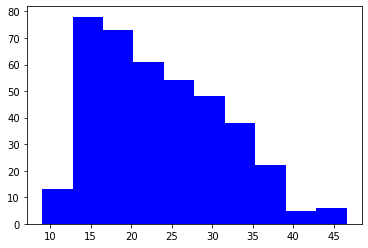

In [16]:
plt.hist(test['mpg'],orientation = 'vertical',histtype = 'bar', color ='blue')
plt.show()

(array([ 3., 10., 40., 46., 66., 60., 67., 58., 39.,  9.]),
 array([2.19722458, 2.36166217, 2.52609977, 2.69053737, 2.85497496,
        3.01941256, 3.18385016, 3.34828775, 3.51272535, 3.67716294,
        3.84160054]),
 <BarContainer object of 10 artists>)

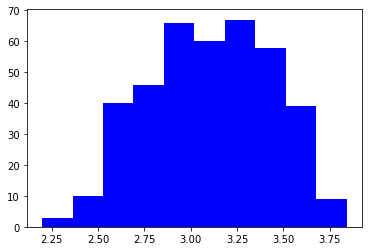

In [17]:
target = np.log(test['mpg'])
target.skew()
plt.hist(target,color='blue')

In [22]:
# create Correlation Heat Map

correlation = numeric_features.corr()
print(correlation['mpg'].sort_values(ascending = False),'\n')

mpg             1.000000
model year      0.579267
origin          0.563450
acceleration    0.420289
cylinders      -0.775396
displacement   -0.804203
weight         -0.831741
Name: mpg, dtype: float64 



<AxesSubplot:title={'center':'auto mpg'}>

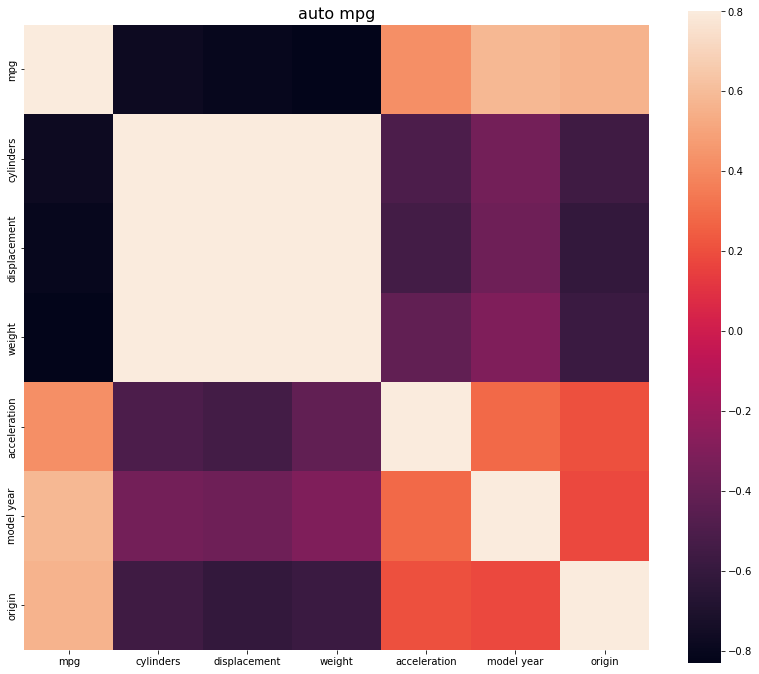

In [24]:
# create Correlation Heat Map

f , ax = plt.subplots(figsize = (14,12))

plt.title('auto mpg',y=1,size=16)

sns.heatmap(correlation,square = True,  vmax=0.8)

KeyError: 'weight'

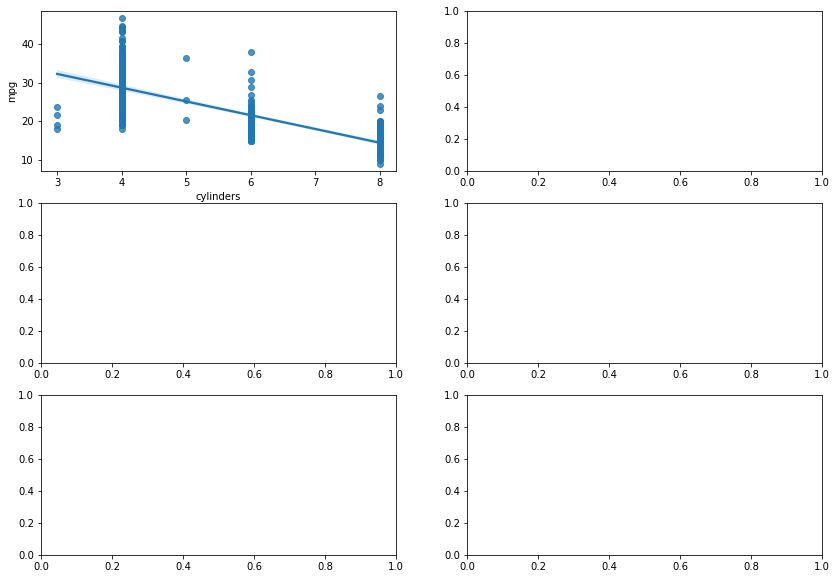

In [25]:
# Scatter plot for different parameters

fig, ((ax1, ax2), (ax3, ax4),(ax5,ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(14,10))
cylinders_scatter_plot = pd.concat([test['mpg'],test['cylinders']],axis = 1)
sns.regplot(x='cylinders',y = 'mpg',data = cylinders_scatter_plot,scatter= True, fit_reg=True, ax=ax1)
displacement_scatter_plot = pd.concat([test['mpg'],test['displacement']],axis = 1)
sns.regplot(x='weight',y = 'mpg',data = displacement_scatter_plot,scatter= True, fit_reg=True, ax=ax2)
weight_scatter_plot = pd.concat([test['mpg'],test['weight']],axis = 1)
sns.regplot(x='weight',y = 'mpg',data = weight_scatter_plot,scatter= True, fit_reg=True, ax=ax3)
acceleration_scatter_plot = pd.concat([test['mpg'],test['acceleration']],axis = 1)
sns.regplot(x='acceleration',y = 'mpg',data = acceleration_scatter_plot,scatter= True, fit_reg=True, ax=ax4)
modelyear_scatter_plot = pd.concat([test['mpg'],test['modelyear']],axis = 1)
sns.regplot(x='modelyear',y = 'mpg',data = modelyear_scatter_plot,scatter= True, fit_reg=True, ax=ax5)
origin_scatter_plot = pd.concat([test['mpg'],test['origin']],axis = 1)
origin_scatter_plot.plot.scatter('origin','SalePrice')

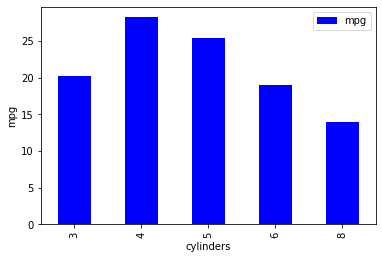

In [27]:
saleprice_overall_quality= test.pivot_table(index ='cylinders',values = 'mpg', aggfunc = np.median)
saleprice_overall_quality.plot(kind = 'bar',color = 'blue')
plt.xlabel('cylinders')
plt.ylabel('mpg')
plt.show()